In [1]:
from complex_mode_overlap import *
import numpy as np

# loading, reshaping, clipping COMSOL .dat

In [12]:
dat_fiber, param_fiber = loadData('../normE_fiber2.dat')
dat, param_list = loadData('../normE_all13a.dat')

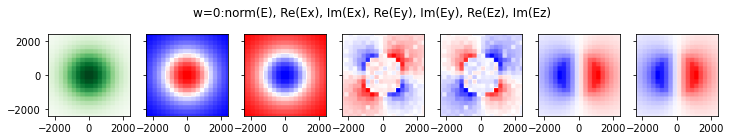

In [10]:
plotComplexData(dat_fiber, range(4), bound=2500)

In [13]:
plotComplexData(dat, param_list, bound=2500)

In [ ]:
def dattoxyComplex(dat, n_param, n_dim = 3):
    
    x = np.real(dat[:, 0]); y = np.real(dat[:, 1])

    (m,n)   = np.shape(dat)
    z = np.reshape(dat[:,2:],(m,n_param,n_dim+1))

    return x, y, z

def getComplexCorrelation(E_ref, E_i, i):

        xc = 0j*np.zeros(np.shape(E_ref[:,:,0,1]))

        norm_factor = np.sum(E_ref[:,:,0,0]**2)*np.sum(E_i[:,:,i,0]**2)

        for j in [1,2,3]:
            xc_j = signal.correlate2d(
                np.conj(E_ref[:,:,0,j]), E_i[:,:,i,j]
                , mode="same", boundary='wrap')
            xc += np.abs(xc_j)**2/norm_factor
            
        return np.real(xc)


def checkNorm(E):

    norm_compute = np.abs(E)


def plotCorrvsparams(param_list, xcpeaks, xcpeaks2 =[]):
    param_list = np.array(param_list, dtype=float)
    plt.plot(param_list, xcpeaks, marker='o', linestyle='', label = "fit")
    if xcpeaks2:  
        plt.plot(param_list, xcpeaks2, marker='o', linestyle='', label = "max")  
    plt.locator_params(axis="x", nbins=4)
    plt.ylabel("peak correlation")
    plt.legend()
    plt.xlabel("width (nm)")
    plt.show()

def convolveComplex1(dat_ref, dat, param_list,
                 bound=2000, scale = 1,
                 res=100j, plotflag1 = False,
                 plotflag2=True, fitflag= False,
                 i=0):

    param_list = np.unique(np.array(param_list,dtype=float))

    xref, yref, zref = dattoxyComplex(dat_ref, 1)
    values_ref, corners_ref = cropData(xref, yref, zref, bound,scale,res)   
    #values dimension: (res, res, 1, 3)

    n_param = len(param_list); xclist = []; xcpeaks1 = []; xcpeaks2 = []

    x, y, z   = dattoxyComplex(dat, n_param)
    values, corners = cropData(x, y, z, bound, scale, res)
    #values dimension: (res, res, n_param, 3)

    for i in range(n_param):
               
        xc_norm = getComplexCorrelation(values_ref, values, i)

        normpeak1, xcfit = fitCorrelation(xc_norm)
        
        xclist.append(xc_norm)
        xcpeaks1.append(normpeak1)
        xcpeaks2.append(np.max(xc_norm))

        if plotflag1:
            plotCorr2D(xc_norm, corners, fitflag, xcfit = xcfit)

    if plotflag2:
        plotCorrvsparams(param_list, xcpeaks1, xcpeaks2)

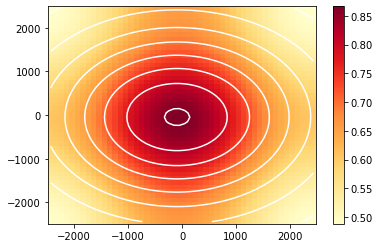

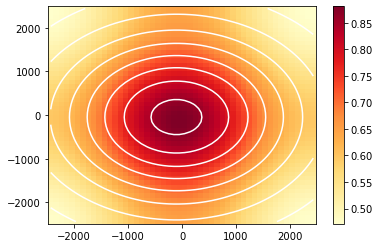

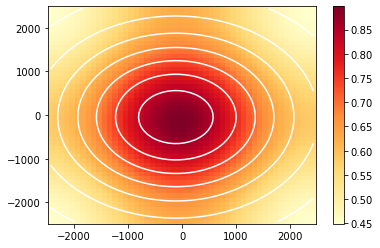

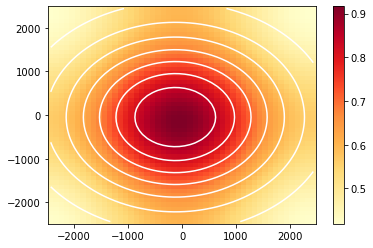

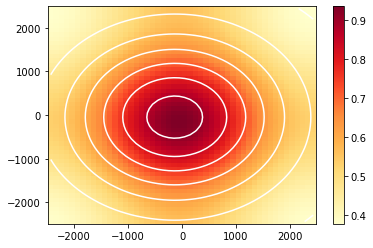

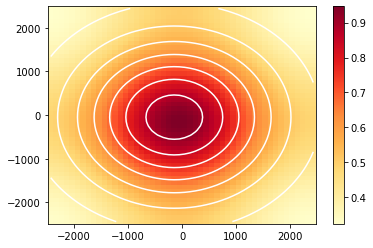

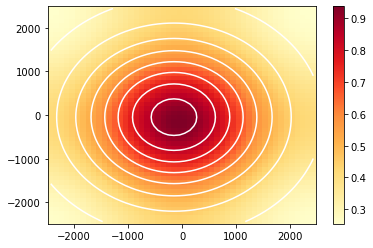

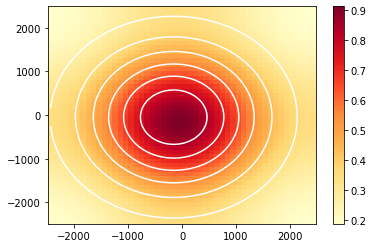

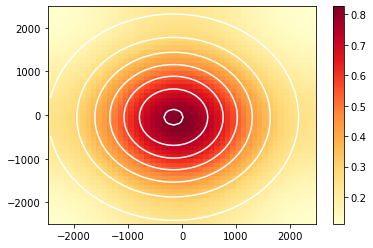

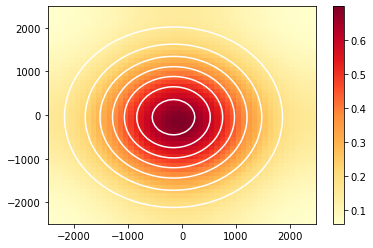

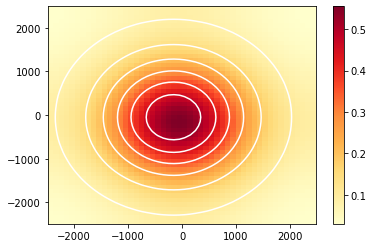

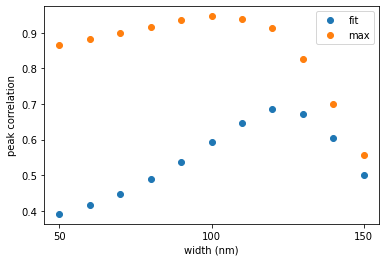

In [ ]:
convolveComplex1(dat_fiber, dat, param_list,
                 bound=2500, scale = 1,
                 res=50j, plotflag1 = True,
                 plotflag2=True, fitflag= True,
                 i=0)

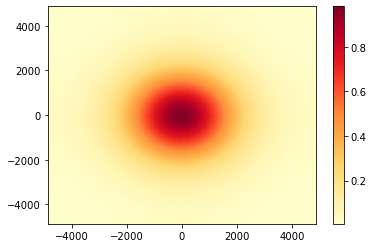

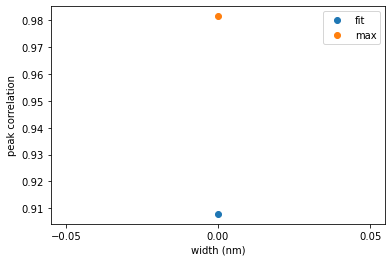

In [6]:
convolveComplex1(dat_fiber, dat_fiber, [0],
                 bound=5000, scale = 1,
                 res=150j, plotflag1 = True,
                 plotflag2=True, fitflag= False,
                 i=0)

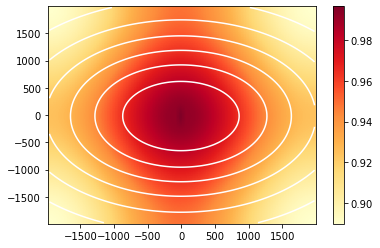

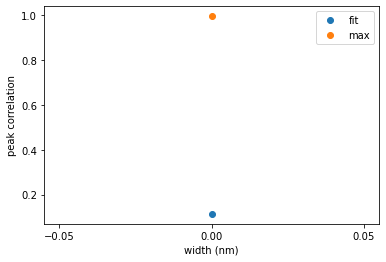

In [7]:
convolveComplex1(dat[:,:6], dat[:,:6], [0],
                 bound=2000, scale = 1,
                 res=100j, plotflag1 = True,
                 plotflag2=True, fitflag= True,
                 i=0)